<a href="https://colab.research.google.com/github/jakubmis1998/NeuralNetworks/blob/main/digitsRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Single image shape: (7, 5)
Row shape: (8, 7, 5)
Array shape: (10, 8, 7, 5)
Samples number: 80


Perceptron 0 efficiency: 100.0%
Perceptron 1 efficiency: 100.0%
Perceptron 2 efficiency: 100.0%
Perceptron 3 efficiency: 100.0%
Perceptron 4 efficiency: 100.0%
Perceptron 5 efficiency: 100.0%
Perceptron 6 efficiency: 100.0%
Perceptron 7 efficiency: 100.0%
Perceptron 8 efficiency: 100.0%
Perceptron 9 efficiency: 100.0%


Perceptron 0: ---
Perceptron 1: That's my digit
Perceptron 2: ---
Perceptron 3: ---
Perceptron 4: ---
Perceptron 5: ---
Perceptron 6: ---
Perceptron 7: ---
Perceptron 8: ---
Perceptron 9: ---


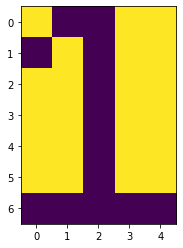

In [5]:
# Digits recognition

import keras.preprocessing.image as kpi
from matplotlib import pyplot as plt
import numpy as np

class Perceptron():
  def __init__(self, learning_rate, iterations, sample_dim, samples_dim):
    """
      Initialization of perceptron.

      Args:
        learning_rate (float) - const learning rate.
        iterations (integer) - learning iterations amount.
        sample_dim ((integer, integer)) - single sample dimensions.
        samples_dim ((integer, integer)) - all samples dimensions.
    """
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.sample_dim = sample_dim
    self.samples_dim = samples_dim
    # Random THETA [-1, 1)
    self.THETA = np.random.default_rng().uniform(-1, 1, 1)[0]
    # Random weights [-1, 1)
    self.weights = np.random.default_rng().uniform(-1, 1, self.sample_dim)
  
  def train(self, training_data, expected_values):
    """
      Perceptron learning based on training and expected data.

      Args:
        training_data (NumPy 2D array) - training data set.
        expected_values (NumPy 2D array) - set of correct(expected) values.
    """
    global_life_time = 0
    local_life_time = 0
    best_weights = np.copy(self.weights)

    for index in range(self.iterations):
      # Coordinates of random digit
      i = np.random.randint(self.samples_dim[0])  # Row
      j = np.random.randint(self.samples_dim[1])  # Column

      # Predict
      ERR = self.predict(training_data[i][j], expected_values[i][j])

      # Unclassified sample
      if ERR != 0:
        # Reset local life time and number of classified samples
        local_life_time = 0
        local_classified_number = 0
        # Weights and THETA calculate
        self.weights += self.learning_rate * ERR * training_data[i][j]
        self.THETA -= self.learning_rate * ERR
      # Classified sample
      else:
        # Increase life time
        local_life_time += 1
        # Store current winner and set new better weights
        if global_life_time < local_life_time:
          global_life_time = local_life_time
          best_weights = np.copy(self.weights)
    
    # Set the best weights for perceptron
    self.weights = np.copy(best_weights)

  def predict(self, digit, expected_value):
    """
      Checks if given data returns expected value based on the learned perceptron.

      Args:
        digit (NumPy array): Digit.
        expected_value (number): 0(No) / 1(Yes).
    """
    O = 1 if np.dot(self.weights.flatten(), digit.flatten()) - self.THETA >= 0 else -1
    ERR = expected_value - O
    return ERR
  
  def calculate_efficiency(self, all_digits, digit):
    """
      Returns efficiency of perceptron in %.

      Args:
        all_digits (NumPy array): All of the digits.
        digit (number): Digit to recognize.
    """
    samples_number = 1.0
    correctly_classified = 0.0
    # Calculate number of all samples
    for dim in self.samples_dim:
      samples_number *= dim
    
    for i in range(self.samples_dim[0]):
      for j in range(self.samples_dim[1]):
        # **digit** Recognition
        if i == digit:
          if self.predict(all_digits[i][j], 1) == 0:
            correctly_classified += 1
        else:
          if self.predict(all_digits[i][j], -1) == 0:
            correctly_classified += 1

    return correctly_classified / samples_number * 100

  def recognize_digit(self, digit):
    """
      Returns if perceptron recognizes given digit.

      Args:
        digit (NumPy array): Digit to recognize as an NumPy array.
    """
    return "That's my digit" if self.predict(digit, 1) == 0 else "---"

  def split_into_2D(self, image_name):
    # 2D array with single pictures
    array_2D = np.array([])

    # Load the main image
    main_img = kpi.load_img(image_name)

    # Convert to numpy array
    all_images = kpi.img_to_array(main_img)  # RGB 0-255 values
    all_images /= 255  # RGB 0-1 values

    # Split entire array with all digits to single images
    for i in range(self.samples_dim[0]):
      row = np.array([])
      for j in range(self.samples_dim[1]):
        # Create single 7x5 and remove last RGB canal
        single_image = all_images[
          i*self.sample_dim[0]:(i+1)*self.sample_dim[0],
          j*self.sample_dim[1]:(j+1)*self.sample_dim[1]
        ][:, :, 0]
        # Append single 7x5 picture
        row = np.append(row, single_image)
      # Append 8 pictures (row of 7x5 single pictures)
      array_2D = np.append(array_2D, row)
    
    # Make 2D array with 7x5 pictures
    array_2D = array_2D.reshape(
      self.samples_dim[0],
      self.samples_dim[1],
      self.sample_dim[0],
      self.sample_dim[1]
    )
    print("Single image shape:", array_2D[0][0].shape)
    print("Row shape:", array_2D[0].shape)
    print("Array shape:", array_2D.shape)
    print("Samples number:", array_2D.size // (self.sample_dim[0] * self.sample_dim[1]))
    print("\n")

    return array_2D

def show_image(img):
  """Show 2D image from NumPy array"""
  plt.imshow(img)

if __name__ == "__main__":
  # Perceptrons initialization
  perceptrons = []
  for i in range(10):
    perceptrons.append(
      Perceptron(
        learning_rate=0.1,
        iterations=2000,
        sample_dim=(7, 5),
        samples_dim=(10, 8)
      )
    )
  
  # An 2D array of single pictures
  images = perceptrons[0].split_into_2D('mnist.png')
  
  for i, perceptron in enumerate(perceptrons):
    # 8 samples 2D of digits == i
    A = images[i]
    # 72 samples 2D of digits != i
    B = np.delete(images, i, 0)

    # Samples for perceptron learning
    E = np.zeros((
      perceptron.samples_dim[0],
      perceptron.samples_dim[1],
      perceptron.sample_dim[0],
      perceptron.sample_dim[1]
    ))  # 80 samples
    E = B  # 72 bad samples
    E = np.insert(E, i, A, axis=0)  # 8 good samples at i index

    # True results for perceptron learning
    T = np.zeros((perceptron.samples_dim[0], perceptron.samples_dim[1]))
    T[:, :] = -1
    T = np.insert(T, i, 1, axis=0)

    # Train perceptron with his data and expected values
    perceptron.train(E, T)

    # Calculate perceptron efficienct running it on all samples
    print("Perceptron {} efficiency: {}%".format(i, perceptron.calculate_efficiency(E, i)))

  # Digit recognition
  print("\n")
  digit = E[1][0]
  for i, perceptron in enumerate(perceptrons):
    print("Perceptron {}: {}".format(i, perceptron.recognize_digit(digit)))
  show_image(digit)

